In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\user\Documents\python\round2\clean_dataset.csv')

In [3]:
X = df.iloc[:, 2:]
y = df['label']

In [6]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selector = SelectKBest(score_func=f_classif, k=70)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

accuracy = model.score(X_test_selected, y_test)
print("Độ chính xác:", accuracy)

selected_features = X.columns[selector.get_support()]
print("Các đặc trưng được chọn:", selected_features)


Độ chính xác: 0.8806924101198402
Các đặc trưng được chọn: Index(['MID_TERM_COUNT', 'SHORT_TERM_COUNT_BANK', 'MID_TERM_COUNT_BANK',
       'SHORT_TERM_COUNT_NON_BANK', 'MID_TERM_COUNT_NON_BANK',
       'NUMBER_OF_LOANS', 'NUMBER_OF_LOANS_BANK', 'NUMBER_OF_LOANS_NON_BANK',
       'NUMBER_OF_CREDIT_CARDS', 'NUMBER_OF_CREDIT_CARDS_BANK',
       'NUMBER_OF_RELATIONSHIP', 'NUMBER_OF_RELATIONSHIP_BANK',
       'NUMBER_OF_RELATIONSHIP_NON_BANK', 'NUM_NEW_LOAN_TAKEN_3M',
       'NUM_NEW_LOAN_TAKEN_6M', 'NUM_NEW_LOAN_TAKEN_9M',
       'NUM_NEW_LOAN_TAKEN_12M', 'NUM_NEW_LOAN_TAKEN_BANK_3M',
       'NUM_NEW_LOAN_TAKEN_BANK_6M', 'NUM_NEW_LOAN_TAKEN_BANK_9M',
       'NUM_NEW_LOAN_TAKEN_BANK_12M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_3M',
       'NUM_NEW_LOAN_TAKEN_NON_BANK_6M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_9M',
       'NUM_NEW_LOAN_TAKEN_NON_BANK_12M', 'OUTSTANDING_BAL_CC_3M',
       'OUTSTANDING_BAL_CC_6M', 'OUTSTANDING_BAL_CC_9M',
       'OUTSTANDING_BAL_CC_12M', 'OUTSTANDING_BAL_ALL_3M',
       'OUTSTAND

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
seed = 2023
models = [
    LinearSVC(max_iter=12000, random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(algorithm='SAMME'),
    XGBClassifier(eval_metric='logloss', random_state=seed)
]

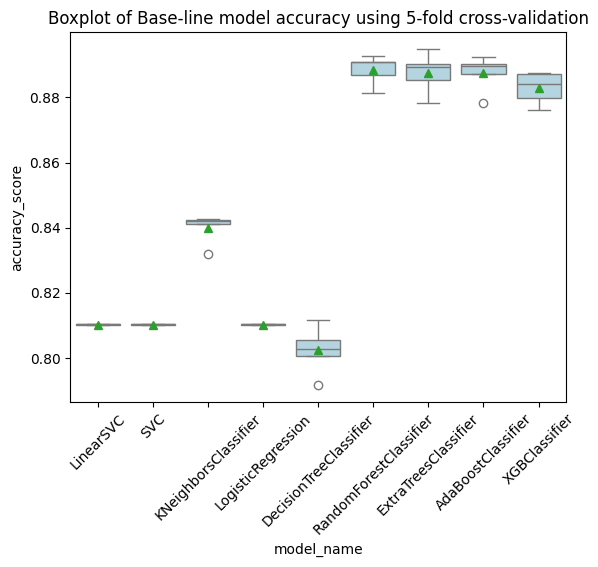

,Mean,Standard Deviation
model_name,,
RandomForestClassifier,0.888451,0.004582
ExtraTreesClassifier,0.887545,0.006206
AdaBoostClassifier,0.887545,0.005522
XGBClassifier,0.882911,0.004832
KNeighborsClassifier,0.840028,0.004562
LogisticRegression,0.810249,0.000118
LinearSVC,0.810249,0.000118
SVC,0.810249,0.000118
DecisionTreeClassifier,0.802525,0.007299


In [16]:
from sklearn.model_selection import StratifiedKFold

def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    #define k-fold
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
            
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
    

    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title('Boxplot of Base-line model accuracy using 5-fold cross-validation')
        plt.xticks(rotation=45)
        plt.show()
    
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']
    
    baseline_results.sort_values(by='Mean', ascending=False, inplace=True)
        
    return baseline_results
        
        
        
generate_baseline_results(models, X, y, metrics='accuracy', cv=5, plot_results=True)